In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
path = '/content/gdrive/Othercomputers/내 노트북/Desktop/Dacon/ComputerVIsion'

import os
os.chdir(path)

Mounted at /content/gdrive/


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from glob import glob
from pprint import pprint
from collections import defaultdict
import gc

In [ ]:
train_df = pd.read_csv('./open/train_df.csv')
test_df = pd.read_csv('./open/test_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: './open/train_df.csv'

In [ ]:
train_df.head()  #index	file_name	class	state	label
train_df.nunique()
# index        4277
# file_name    4277
# class          15
# state          49
# label          88
# dtype: int64
train_df.head()

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


In [ ]:
train_images = glob("./open/train/*")
test_images = glob("./open/test/*")
print(f"훈련 데이터셋 이미지 개수: {len(train_images)}")
print(f"테스트 데이터셋 이미지 개수: {len(test_images)}")


훈련 데이터셋 이미지 개수: 4277
테스트 데이터셋 이미지 개수: 2154


In [ ]:
import PIL
PIL.Image

<module 'PIL.Image' from '/usr/local/lib/python3.10/dist-packages/PIL/Image.py'>

In [ ]:
def load_CIFAR10(path):
    shape_dict = {}
    path = path
    images = []
    for filename in glob(path +"*"):
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array

            if img_array.shape not in shape_dict:
                shape_dict[img_array.shape] = []
            shape_dict[img_array.shape].append(filename)

            sys.stdout.write(f"\rfile: {filename} \t | shape: {img_array.shape}")
            sys.stdout.flush()


            images.append(img_array) #append array to training_images

    print()

    for shape, img_paths in shape_dict.items():
        print(f"Shape: {shape}, path: {img_paths}\n")

In [ ]:
training_images = load_CIFAR10(path='./open/train/') #shape 확인용

file: ./open/train/10274.png 	 | shape: (1024, 1024, 3)Shape: (1024, 1024), path: ['./open/train/13264.png', './open/train/13302.png', './open/train/13290.png', './open/train/13292.png', './open/train/13328.png', './open/train/13308.png', './open/train/13325.png', './open/train/13316.png', './open/train/13331.png', './open/train/13343.png', './open/train/13337.png', './open/train/13347.png', './open/train/13335.png', './open/train/13349.png', './open/train/13363.png', './open/train/13365.png', './open/train/13359.png', './open/train/13358.png', './open/train/13369.png', './open/train/13378.png', './open/train/13390.png', './open/train/13389.png', './open/train/13385.png', './open/train/13381.png', './open/train/13386.png', './open/train/13396.png', './open/train/13379.png', './open/train/13391.png', './open/train/13392.png', './open/train/13377.png', './open/train/13416.png', './open/train/13405.png', './open/train/13422.png', './open/train/13421.png', './open/train/13425.png', './open

In [ ]:
import numpy as np

def resize_and_pad(image, target_size):
    """
    이미지의 크기를 조정하고 패딩을 추가하여 원하는 크기로 맞춥니다.

    Parameters:
        image (numpy.ndarray): 입력 이미지
        target_size (tuple): 목표 크기 (height, width)

    Returns:
        numpy.ndarray: 목표 크기로 조정된 이미지
    """
    target_height, target_width = target_size
    original_height, original_width = image.shape[:2]

    # 이미지의 비율을 유지하면서 목표 크기에 맞추도록 리사이즈
    scale = min(target_width / original_width, target_height / original_height)
    new_width = int(original_width * scale)
    new_height = int(original_height * scale)
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # 패딩 추가하여 목표 크기에 맞춤
    delta_w = target_width - new_width
    delta_h = target_height - new_height
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    color = [0, 0, 0]  # 패딩 색상 (검정색)

    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return padded_image

In [ ]:
#제일 많은 shape: (1024, 1024, 3)
target_shape = (1024, 1024, 3)

def load_CIFAR10(path):
    shape_dict = {}
    path = path
    images = []
    for filename in glob(path +"*"):
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array

            if img_array.shape != target_shape:
                img_array = resize_and_pad(img_array, (1024,1024))

            sys.stdout.write(f"\rfile: {filename} \t | shape: {img_array.shape}")
            sys.stdout.flush()

            # if img_array.shape not in shape_dict:
            #     shape_dict[img_array.shape] = []
            # shape_dict[img_array.shape].append(filename)

            images.append(img_array) #append array to training_images
    images = np.array(images)
    print()

    # for shape, img_paths in shape_dict.items():
    #     print(f"Shape: {shape}, path: {img_paths}\n")
    #print(f'shape_dict should not be empty:{len(shape_dict)}')

    return images


In [ ]:
training_images = load_CIFAR10(path='./open/train/')

NameError: name 'load_CIFAR10' is not defined

In [ ]:
training_images

NameError: name 'training_images' is not defined

In [ ]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", train_df.shape)

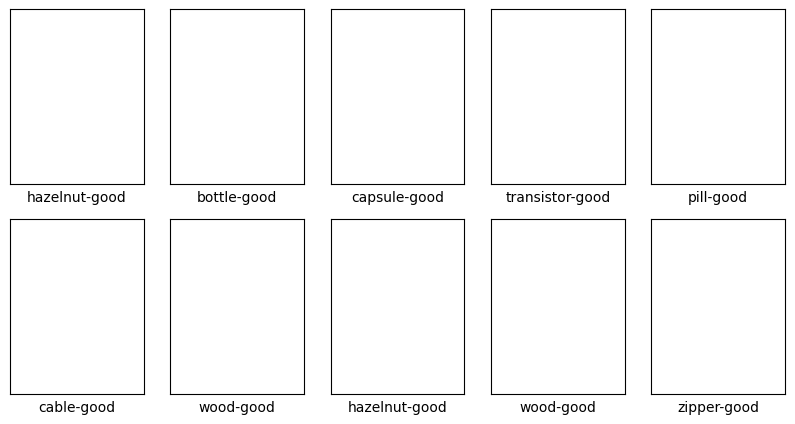

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,858)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_df.label[num])
    #plt.imshow(training_images[num])
plt.show()

In [ ]:
print(np.unique(train_df.label))
print(len(np.unique(train_df.label))) #88

['bottle-broken_large' 'bottle-broken_small' 'bottle-contamination'
 'bottle-good' 'cable-bent_wire' 'cable-cable_swap' 'cable-combined'
 'cable-cut_inner_insulation' 'cable-cut_outer_insulation' 'cable-good'
 'cable-missing_cable' 'cable-missing_wire' 'cable-poke_insulation'
 'capsule-crack' 'capsule-faulty_imprint' 'capsule-good' 'capsule-poke'
 'capsule-scratch' 'capsule-squeeze' 'carpet-color' 'carpet-cut'
 'carpet-good' 'carpet-hole' 'carpet-metal_contamination' 'carpet-thread'
 'grid-bent' 'grid-broken' 'grid-glue' 'grid-good'
 'grid-metal_contamination' 'grid-thread' 'hazelnut-crack' 'hazelnut-cut'
 'hazelnut-good' 'hazelnut-hole' 'hazelnut-print' 'leather-color'
 'leather-cut' 'leather-fold' 'leather-glue' 'leather-good' 'leather-poke'
 'metal_nut-bent' 'metal_nut-color' 'metal_nut-flip' 'metal_nut-good'
 'metal_nut-scratch' 'pill-color' 'pill-combined' 'pill-contamination'
 'pill-crack' 'pill-faulty_imprint' 'pill-good' 'pill-pill_type'
 'pill-scratch' 'screw-good' 'screw-mani

In [ ]:
uniq_labels = train_df.label

unique_labels, counts = np.unique(uniq_labels, return_counts=True)

# Creating a DataFrame to display the results in a table and sorting by counts
unique_labels_table = pd.DataFrame({'Unique labels': unique_labels, 'Counts': counts})
unique_labels_table_sorted = unique_labels_table.sort_values(by='Counts', ascending=False)


# Display the tables
print("Table using np.unique (sorted by Counts):")
print(unique_labels_table_sorted)


Table using np.unique (sorted by Counts):
                 Unique labels  Counts
33               hazelnut-good     391
55                  screw-good     320
21                 carpet-good     280
52                   pill-good     267
28                   grid-good     264
..                         ...     ...
8   cable-cut_outer_insulation       5
71     transistor-damaged_case       5
70         transistor-cut_lead       5
12       cable-poke_insulation       5
74                  wood-color       4

[88 rows x 2 columns]


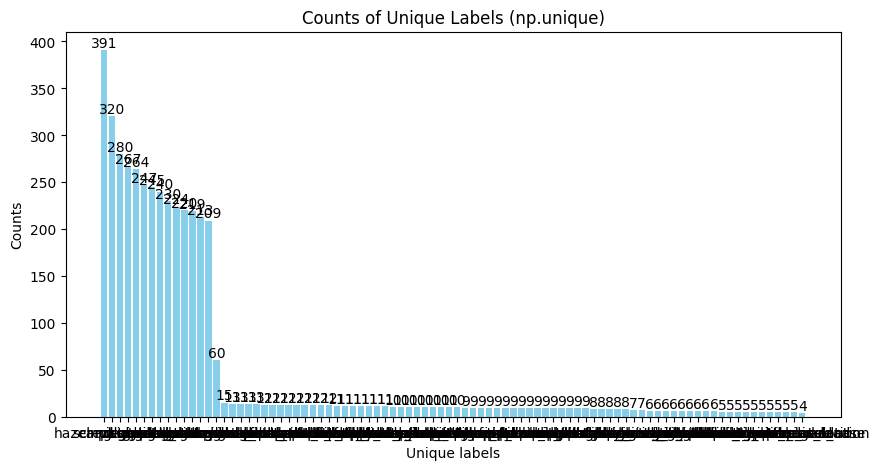

In [ ]:
# Using Pandas to calculate label counts directly from a DataFrame and sorting by counts
df = pd.DataFrame({'labels': uniq_labels})
label_counts = df['labels'].value_counts().reset_index()
label_counts.columns = ['Unique labels', 'Counts']
label_counts_sorted = label_counts.sort_values(by='Counts', ascending=False)

# Plotting the results using np.unique
plt.figure(figsize=(10, 5))
bars = plt.bar(unique_labels_table_sorted['Unique labels'], unique_labels_table_sorted['Counts'], color='skyblue')
plt.xlabel('Unique labels')
plt.ylabel('Counts')
plt.title('Counts of Unique Labels (np.unique)')
plt.xticks(unique_labels_table_sorted['Unique labels'])

# Adding text on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

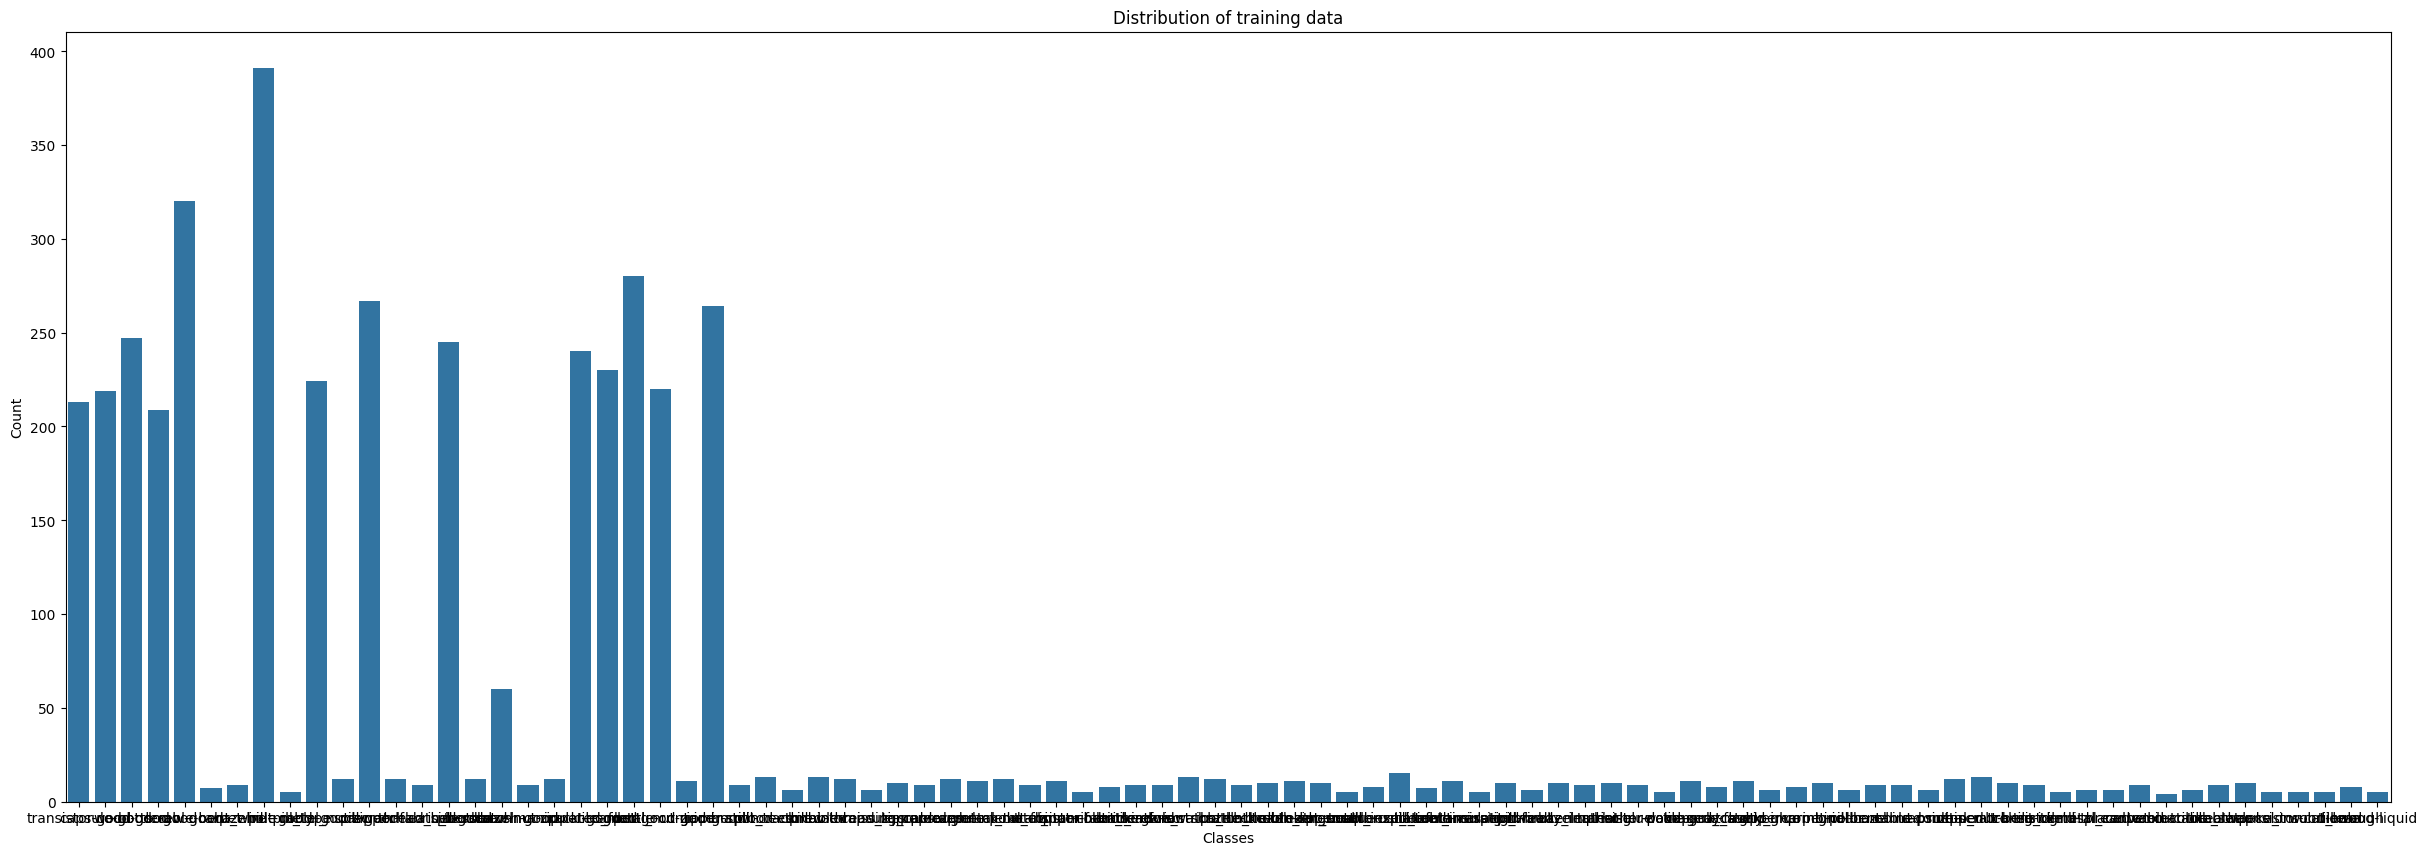

In [ ]:
plt.figure(figsize=[30,10])
sns.countplot(x="label", data=train_df)
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

클래스 불균형은 데이터셋 내에서 일부 클래스의 데이터가 다른 클래스보다 훨씬 적거나 많은 상황을 말합니다. 이는 머신러닝 모델이 특정 클래스를 잘 예측하지 못하게 하거나 전체적인 성능을 저하시킬 수 있습니다. 클래스 불균형을 해결하기 위한 여러 기법이 있으며, 각 기법의 효과는 데이터와 문제에 따라 다를 수 있습니다. 다음은 주요 기법들과 그 효과입니다.

# **1. 데이터 수준 접근법**
## **1.1. 언더샘플링 (Undersampling)**
다수 클래스의 샘플 수를 줄여서 클래스 간의 균형을 맞추는 방법입니다.

효과: 데이터셋의 크기를 줄여 모델의 훈련 시간을 단축할 수 있습니다.
단점: 중요한 정보를 잃을 위험이 있습니다.

```
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X, y)
```


## **1.2. 오버샘플링 (Oversampling)**
소수 클래스의 샘플 수를 늘려서 클래스 간의 균형을 맞추는 방법입니다.

효과: 데이터셋의 크기를 늘려 모델이 소수 클래스를 더 잘 학습할 수 있게 합니다. 단점: 오버피팅의 위험이 있습니다.
```
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X, y)
```

## **1.3. SMOTE (Synthetic Minority Over-sampling Technique)**
소수 클래스의 샘플을 합성하여 유사한 패턴을 갖는 새로운 샘플을 생성하는 방법입니다. 오버샘플링 기법 중 하나

효과: 소수 클래스의 샘플을 늘려 모델이 더 잘 학습할 수 있게 하며, 오버피팅을 줄이는 효과가 있습니다.
단점: 노이즈 증가 가능성,계산 비용 증가

```
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

```  
참고) https://abluesnake.tistory.com/116

# **2. 알고리즘 수준 접근법**

## ***2.1. 클래스 가중치 조정 (Class Weight Adjustment)***
모델의 학습 과정에서 클래스 불균형을 고려하여 손실 함수에 클래스 가중치를 부여하는 방법(소수 클래스의 손실 값을 더 크게)입니다.

효과: 모델이 소수 클래스를 더 중요하게 다루도록 합니다.

```
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced') #class_weight 매개변수를 사용,balanced 옵션을 사용하면 자동으로 클래스의 샘플 수에 반비례 하여 가중치 조정
model.fit(X_train, y_train)
```



## ***2.2. 앙상블 기법 (Ensemble Methods)***
여러 모델을 결합하여 예측 성능을 향상시키는 방법입니다. 특히, 다수 클래스에 적합한 여러 가지 분류기를 조합할 수 있습니다.

효과: 다양한 모델을 결합함으로써 개별 모델이 놓칠 수 있는 부분을 보완합니다.

Bagging(BalancedRandomForestClassifier), Boosting(이전 모델의 실수 교정함, AdaBoost, Gradient Boosing)


```
from imblearn.ensemble import BalancedRandomForestClassifier # Bagging

model = BalancedRandomForestClassifier()
model.fit(X_train, y_train)
```


# **3. 평가 지표 변경**

불균형 데이터에서 성능을 평가하기 위해 정확도(accuracy) 외에 다른 평가 지표를 사용하는 방법입니다.
주요 지표: 정밀도(precision), 재현율(recall), F1-score, ROC-AUC, PR-AUC
효과: 모델의 성능을 보다 정확하게 평가할 수 있습니다.


## ***1. 정밀도 (Precision)***
정밀도는 모델이 '양성(긍정)' 클래스라고 '예측'한 샘플 중 실제로 양성(긍정)인 샘플의 비율을 의미합니다.

예를 들어, 이메일 스팸 필터링에서 정상 메일을 스팸으로 잘못 분류하면 중요한 메일이 사라질 수 있음.
부정거래 탐지에서 실제로 정상인 거래를 부정거래로 잘못 탐지하면 고객 불만이나 신뢰 손실이 발생.
법률 문서 검색에서 관련 없는 문서를 반환하지 않도록 하는 경우.
시스템 모니터링에서 경고 알림이 발생할 때마다 그것이 실제로 문제를 나타내야 경고에 대한 신뢰가 유지됨.

정밀도는 **False Positive**를 줄이는 데 중점을 둡니다.

(TP (True Positive): 실제 양성인 샘플을 양성으로 예측한 경우

FP (**False Positive**): '음성'인 샘플인데 '양성으로 예측'한 경우)


## ***2. 재현율 (Recall, Sensitivity, True Positive Rate)***
재현율은 실제 '양성 클래스 샘플' 중에서 모델이 양성으로 예측한 샘플의 비율을 의미합니다.

예를 들어, 의료 진단에서 희귀 질환의 진단, 사기 탐지에서 사기 거래의 탐지, 고장 예측에서 기계 고장의 탐지 등 소수 클래스에 대한 탐지가 중요한 경우

재현율은 **False Negative**를 줄이는 데 중점을 둡니다.
(FN (**False Negative**): '양성'인 샘플을 '음성으로 예측'한 경우)


## ***3. F1 스코어 (F1 Score)***
F1 스코어는 '정밀도와 재현율의 조화 평균'으로, 두 지표 간의 '균형'을 측정합니다.

F1 스코어는 클래스 불균형 상황에서 모델의 성능을 더 잘 반영할 수 있습니다.


## ***4. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)***
ROC-AUC는 모델의 분류 성능을 평가하는 데 사용됩니다. ROC 곡선은 'True Positive' Rate(재현율)와 'False Positive' Rate(음성인데 양성으로 예측, 위양성률) 간의 관계를 나타내며, AUC는 ROC 곡선 아래의 면적을 의미합니다.

**AUC 값이 1에 가까울수록**: 모델의 성능이 우수함을 의미합니다.

**AUC 값이 0.5에 가까울수록**: 모델이 무작위로 예측함을 의미합니다.


## ***5. PR-AUC (Precision-Recall Area Under Curve)***
PR-AUC는 Precision-Recall 곡선 아래의 면적을 의미합니다. 클래스 불균형 데이터셋에서 ROC-AUC보다 더 유용할 수 있습니다.

**PR 곡선**: 정밀도(Precision)를 y축으로, 재현율(Recall)을 x축으로 나타낸 그래프입니다.
PR-AUC 값이 높을수록 모델의 성능이 우수함을 의미합니다.

    
```
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

# 평가 지표 계산
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

```

참고) https://velog.io/@gyrudstory/DataPreProcessing-%EB%B6%88%EA%B7%A0%ED%98%95-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B2%98%EB%A6%AC

## 요약
각 기법의 효과는 데이터의 특성과 문제에 따라 다릅니다. 일반적으로:

언더샘플링: 데이터 크기를 줄여 모델 학습이 빠르지만, 중요한 정보를 잃을 수 있음.
오버샘플링 및 SMOTE: 소수 클래스의 샘플을 늘려 모델이 소수 클래스를 더 잘 학습하도록 하지만, 오버피팅의 위험이 있음.
클래스 가중치 조정: 모델이 소수 클래스를 더 중요하게 다루도록 하여 성능 개선.
앙상블 기법: 개별 모델의 약점을 보완하여 전반적인 성능 향상.
평가 지표 변경: 불균형 데이터에서 성능을 정확하게 평가할 수 있음.

이 기법들은 단독으로 사용되기도 하고, 여러 기법을 결합하여 사용하기도 합니다. 데이터와 문제에 따라 가장 적합한 접근법을 선택하는 것이 중요합니다.

==== 베이스라인 =====

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2

import os
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import f1_score, accuracy_score
import time


device = torch.device('cuda')

In [ ]:
train_png = sorted(glob('train/*.png'))
test_png = sorted(glob('test/*.png'))

In [ ]:
train_png

[]